<h1> Project Handwritten Digit Recognition </h1>

### Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

### Prepare Data

In [2]:
mnist=fetch_openml('mnist_784')
X = mnist.data
y = mnist.target
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [4]:
print(X.shape)
print(y.shape)

pd.Series(y).value_counts()

(70000, 784)
(70000,)


1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

In [5]:
idx = (y=="0")|(y=="2")
X_new = X[idx]
Y_new = y[idx]
print(X_new.shape)
print(Y_new.shape)

(13893, 784)
(13893,)


### Explore data

6


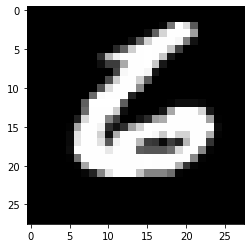

In [6]:
plt.imshow(X[69999].reshape(28,28),cmap="gray")
print(y[69999])

In [7]:
np.unique(Y_new)

array(['0', '2'], dtype=object)

### Split Data

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(X_new,Y_new,
                                           random_state=10,test_size=.20)

In [9]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((11114, 784), (2779, 784), (11114,), (2779,))

In [10]:
print(xtrain.max())
print(xtest.max(), xtest.min())

255.0
255.0 0.0


In [11]:
xtest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Feature Scaling

In [12]:
xtrain=xtrain/255.0
xtest=xtest/255.0

In [13]:
print(xtrain.max(),xtest.max())
print(xtrain.min(),xtest.min())
print("xtrain=",xtrain.shape)
print("xtest=",xtest.shape)
print(xtrain[0].shape)

1.0 1.0
0.0 0.0
xtrain= (11114, 784)
xtest= (2779, 784)
(784,)


### PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(.95)
pca_train=pca.fit_transform(xtrain)
pca_test= pca.transform(xtest)

In [16]:
print("pca_train=",pca_train.shape)
print("pca_test=",pca_test.shape)

pca_train= (11114, 135)
pca_test= (2779, 135)


### Train Model

In [17]:
lg = LogisticRegression(C=.1)
lg.fit(pca_train,ytrain)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print("Training Score: ",lg.score(pca_train,ytrain))

Training Score:  0.9917221522404175


In [19]:
print("Testing Score: ",lg.score(pca_test,ytest))

Testing Score:  0.9892047499100396


### Train Using SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel='linear',probability=True,C=100)
clf.fit(pca_train,ytrain)

In [ ]:
clf_pred=clf.predict(pca_test)

In [ ]:
# tst = cv2.resize(img,(28,28))
# tst.shape
# plt.imshow(tst,cmap="gray")

im = X[8776].reshape(28,28)
plt.imshow(im,cmap="gray")
y[8776]

### Evaluation

In [20]:
test_pred=lg.predict(pca_test)

In [21]:
test_pred

array(['0', '0', '0', ..., '2', '0', '2'], dtype=object)

In [22]:
accuracy_score(test_pred,ytest)

0.9892047499100396

In [24]:
np.where(test_pred != ytest)

(array([  30,   39,   43,  250,  255,  306,  329,  593,  777,  918,  979,
         987, 1093, 1162, 1216, 1291, 1540, 1676, 1717, 1733, 1756, 1876,
        1902, 2004, 2015, 2294, 2372, 2587, 2621, 2729], dtype=int64),)

In [34]:
test_pred[2372]

'0'

In [35]:
ytest[2372]

'2'

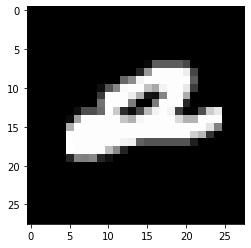

In [37]:
plt.imshow(xtest[2372].reshape(28,28),cmap="gray")

In [38]:
lg.score(pca_test,ytest)

0.9892047499100396

In [ ]:
svm_score = accuracy_score(clf_pred,ytest)
svm_score

### PREDICTION With Image Processing

In [39]:
import cv2

In [50]:
img = cv2.imread("test1.png",0)

In [51]:
img.ndim

2

In [52]:
img.shape

(237, 201)

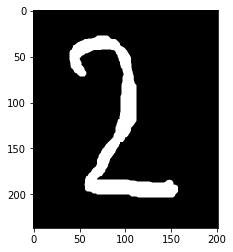

In [53]:
plt.imshow(img,cmap="gray")

### Prepare test data

(28, 28)


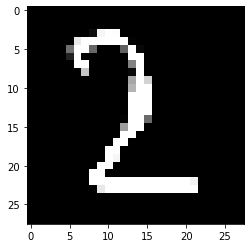

In [54]:
tst = cv2.resize(img,(28,28))
print(tst.shape)
plt.imshow(tst,cmap="gray")

In training data image is reshaped to (1,784)

In [55]:
test = tst.reshape(1,-1)
test.shape

(1, 784)

In [56]:
#feature scaling
print(test.max())
test=test/255.0
print(test.max())

255
1.0


In [57]:
#PCA
print(test.shape)
test=pca.transform(test)
print(test.shape)

(1, 784)
(1, 135)


In [58]:
#Prediction
pred = lg.predict(test)
pred

array(['2'], dtype=object)

In [68]:
## More checking
import os
data=[]
for i in os.listdir("test/"):
    img=cv2.imread('test/'+i,0)
#     #reshape t0 28x28
    img=cv2.resize(img,(28,28))
    data.append(img)
print(data[1].shape)

(28, 28)


In [70]:
print(len(data))
#Again reshape
final = np.array(data).reshape(len(data),-1)
print(final.shape)
print(final.max())
final=final/255.0
print(final.max())

9
(9, 784)
255
1.0


In [71]:
#PCA 
print(final.shape)
test_pca=pca.transform(final)
print(test_pca.shape)

(9, 784)
(9, 135)


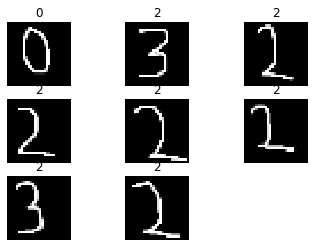

In [76]:
index=0
for i in range(1,len(data)):
    plt.subplot(3,3,i)
    plt.imshow(data[i],cmap='gray')
    plt.title(lg.predict(test_pca)[index])
    plt.axis('off')
    index+=1

In [ ]:
index=0
for i in range(1,len(data)):
    plt.subplot(3,3,i)
    plt.imshow(data[i],cmap='gray')
    plt.title(clf.predict(test_pca)[index])
    plt.axis('off')
    index+=1